In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const


Carroll and Ostlie Exercise 25.20:

25.20) According to the virial theorem, the central radial-velocity dispersion is related to the mass and size of the galaxy by $\sigma_r^2 \propto M/R$ (see Eq. 25.13 in C&O textbook).  Use arguments similar to those for the Tully-Fisher relation to show that $L\propto \sigma_r^4$, which is the Faber-Jackson relation (Eq. 25.40 in C&O textbook).


25.20) Solution:

We're already given the relation $\sigma_r^2 \propto M/R$ in the question.  If we square this equation, it becomes $\sigma_r^4 \propto M^2/R^2$.  The mass-to-light ratio can be approximated as roughly the same for all elliptical galaxies, so $M/L$ is a constant, $M/L=c$.  Rearranging this gives $M=cL$, and squaring this gives $M^2=c^2 L^2$ - let's call $c^2=q$, also a constant.  Substituting this into the $\sigma_r$ relation, we get $\sigma_r^4 \propto M/R \propto qL^2/R^2 \propto L(qL/R^2)$.  The average surface brightness can also be assumed to be constant for elliptical galaxies, so $(qL/R^2)$ is approximately constant as well.  Therefore, $\sigma_r^4 \propto L(qL/R^2) \propto L$.

Note: Tully-Fisher relation applies to spiral galaxies, while Faber-Jackson relation applies to elliptical galaxies.


Carroll and Ostlie Exercise 25.24.

25.24) Plot $log_{10} \phi(M)$, the logarithm of the Schechter luminosity function, for both the local field of galaxies near the Milky Way and the Virgo cluster over the range -23<$M_B$<-12.  Use values of $\alpha=-1.0$ and $M_B^{\ast}=-21$.

b) Solution: 

Using Eq. (25.46) in C&O, $\phi(M)dM \sim 10^{-0.4(\alpha+1)M}e^{-10^{0.4(M^{\ast}-M}}dM$


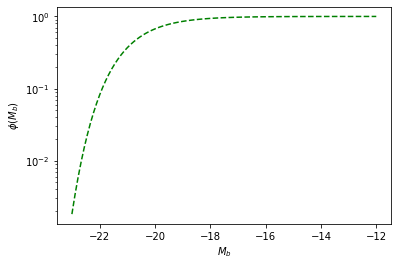

In [10]:
#Part C with astropy
M_star = np.linspace(-23.0,-12.0,100)
alpha = -1.0
Mb_star = -21.0
phi = (10**(-0.4*(alpha+1.0)*M_star))*np.exp(-10**(0.4*(Mb_star - M_star)))

plt.figure()
plt.plot(M_star, phi, c='green', linestyle='--')
plt.xlabel(r'$M_b$')
plt.ylabel(r'$\phi(M_b)$')
plt.yscale('log')
plt.show()


Exercise Question: 

a) A hypothetical galaxy has a mass of 1.0e12$M_{\odot}$.  For a range of radii [1.0, 5.0]kpc, graph the velocity of an object in orbit.  What is the maximum velocity this galaxy can have?  (Assume the mass in the galaxy has a spherical distribution, and all the mass is located within r $\leq$ 1kpc).

a) Solution:

Centripetal acceleration is given by $\cfrac{v^2}{r}$, gravitational acceleration is given by $F_{gravity}/m = \bigg( \frac{GMm}{r^2}\bigg)/m = \cfrac{GM}{r^2}$.  Rearranging gives us $\cfrac{v^2}{r} = \cfrac{GM}{r^2} \rightarrow v=\big[\frac{GM}{r}\big]^{1/2}$


2073865.2969844209 m / s


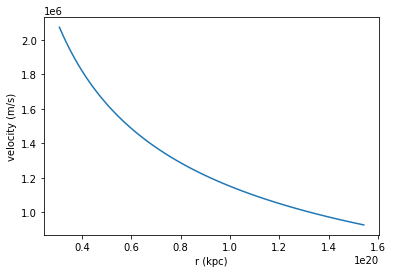

In [12]:
#code and numerical solutions

mass = 1.0e12*const.M_sun
rs = np.linspace(1.0,5.0,100)
radius = (rs*u.kpc).to(u.m)
v = np.sqrt(mass*const.G/radius)
vmax=np.max(v)

print(vmax)

plt.figure()
plt.plot(radius, v)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('r (kpc)')
plt.ylabel('velocity (m/s)')
plt.show()

b) Assume this galaxy has an apparent bolometric magnitude of 10.0.  What is the absolute bolometric magnitude of this galaxy?

In [27]:
#using the formula M_bol = -11(log(v_max)) + 3.31
#Tully-Fisher relation for late spiral (Sc) type galaxies

M_bol = -11*np.log10((vmax.to(u.km/u.s)).value) + 3.31
print(M_bol)

-33.17458598837962
